# Heart Disease Analytics - Henry Volkmann
------------

## Goals 

1. Discover patterns in data regarding heart disease (patients who have reported coronary heart disease (CHD) or myocardial infarction (MI))
2. be able to accurately predict/identify high-risk patients for such diseases

## Model of choice
I will use a logistic regression algorithm since the dependent variable (HeartDisease) is binary.

- First I must import dependancies I will need

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

data = pd.read_excel('heart_2020.xlsx')

## Cleaning data

- I am mapping all binary data (yes or no, male or female) to 1 or 0. Prior to this step I checked each column with the method .unique() to ensure that I do not mis any unique data pointsin a variable.
- For "AgeCategory" I assigned each unique value to an integer from 1 to 13 to make analyzing the data simpler


In [2]:
data["HeartDisease"] = data["HeartDisease"].map({"Yes": '1', "No": '0'})
data["Smoking"] = data["Smoking"].map({"Yes":1, "No":0})
data["AlcoholDrinking"] = data["AlcoholDrinking"].map({"Yes":1, "No":0})
data["Stroke"] = data["Stroke"].map({"Yes":1, "No":0})
data["DiffWalking"] = data["DiffWalking"].map({"Yes":1, "No":0})
data["Sex"] = data["Sex"].map({"Male":1, "Female":0})
data["AgeCategory"] = data["AgeCategory"].map({"18-24":1, "25-29":2,"30-34":3,"35-39":4,"40-44":5, "45-49":6, "50-54":7, "55-59":8, "60-64":9, "65-69":10, "70-74":11, "75-79":12, "80 or older":13})
data["PhysicalActivity"] = data["PhysicalActivity"].map({"Yes":1, "No":0})
data["Asthma"] = data["Asthma"].map({"Yes":1, "No":0})
data["KidneyDisease"] = data["KidneyDisease"].map({"Yes":1, "No":0})
data["SkinCancer"] = data["SkinCancer"].map({"Yes":1, "No":0})

## Exploration of variables

- Below you can see that the data is highly misrepresented, thus I must balance out the target variable inorder to have an effective model. Before I create my model, I will explore more of the independent variables to understand some fundemental relationships.

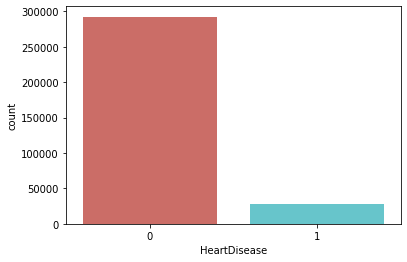

0    292422
1     27373
Name: HeartDisease, dtype: int64

In [3]:
from collections import Counter

sns.countplot(x="HeartDisease", data=data, palette="hls")
plt.show()
data["HeartDisease"].value_counts()

In [4]:
data.groupby('HeartDisease').mean()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer
HeartDisease,,,,,,,,,,,,,,
0,28.224658,0.396246,0.070569,0.026263,2.956416,3.828778,0.117577,0.464572,7.259943,0.788135,7.093416,0.129741,0.028466,0.084942
1,29.401592,0.585869,0.041683,0.160340,7.808242,4.641764,0.366346,0.589596,10.234318,0.638914,7.136156,0.180214,0.126219,0.181931


In [5]:
data.groupby('Race').mean()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer
Race,,,,,,,,,,,,,,
American Indian/Alaskan Native,29.627678,0.549020,0.059785,0.059016,4.791042,5.036332,0.206651,0.461938,6.816225,0.717801,7.056709,0.170511,0.047674,0.032680
Asian,25.218303,0.227938,0.033218,0.018716,1.630640,2.755454,0.055404,0.517848,5.655801,0.806767,6.918691,0.098042,0.016981,0.006941
Black,30.169993,0.344740,0.044553,0.054754,3.696935,4.211561,0.188151,0.408300,7.065958,0.709752,6.992763,0.160164,0.043812,0.006016
Hispanic,28.818086,0.305035,0.055309,0.021679,3.227137,4.188297,0.129600,0.469394,5.625847,0.698317,7.035014,0.138381,0.030095,0.015084
Other,28.748967,0.454887,0.075403,0.043558,4.052343,5.225750,0.154466,0.498536,6.353953,0.779374,6.860359,0.184846,0.034773,0.043924
White,28.153422,0.432124,0.072729,0.037861,3.354310,3.790924,0.135911,0.480042,7.895588,0.790133,7.131054,0.129284,0.037449,0.116475


### Creating Dummy variables
- Now I will create dummy variables for the categorical variables. This will make the data to be easier to process for the model.

In [6]:
cat_vars = ['AgeCategory', 'Race', 'Diabetic', 'GenHealth']
for var in cat_vars:
    cat_list = 'var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1 = data.join(cat_list)
    data = data1

cat_vars = ['AgeCategory', 'Race', 'Diabetic', 'GenHealth']
data_vars = data.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

In [7]:
data_final = data[to_keep]
data_final.columns.values

array(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex',
       'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'AgeCategory_1', 'AgeCategory_2', 'AgeCategory_3',
       'AgeCategory_4', 'AgeCategory_5', 'AgeCategory_6', 'AgeCategory_7',
       'AgeCategory_8', 'AgeCategory_9', 'AgeCategory_10',
       'AgeCategory_11', 'AgeCategory_12', 'AgeCategory_13',
       'Race_American Indian/Alaskan Native', 'Race_Asian', 'Race_Black',
       'Race_Hispanic', 'Race_Other', 'Race_White', 'Diabetic_No',
       'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)', 'GenHealth_Excellent',
       'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor',
       'GenHealth_Very good'], dtype=object)

- Now I will undersample the data in order to balance positive & negative heart disease cases

In [8]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

X = data_final.loc[:, data_final.columns != 'HeartDisease']
y = data_final.loc[:, data_final.columns == 'HeartDisease']

rus = RandomUnderSampler(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns1 = X_train.columns

X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [9]:
X_train_rus = pd.DataFrame(data=X_train_rus, columns=columns1)
y_train_rus = pd.DataFrame(data=y_train_rus, columns=['HeartDisease'])

In [10]:
print('length of undersampled data is:', len(X_train_rus))
print('Number of no heart disease patients:', y_train_rus['HeartDisease'].value_counts()[0])
print('Number of heart disease patients:', y_train_rus['HeartDisease'].value_counts()[1])
print('Proportion of no heart disease patients in undersampled data is:', y_train_rus['HeartDisease'].value_counts()[0]/len(X_train_rus))
print('Proportion of heart disease patients in undersampled data is:', y_train_rus['HeartDisease'].value_counts()[1]/len(X_train_rus))

length of undersampled data is: 38328
Number of no heart disease patients: 19164
Number of heart disease patients: 19164
Proportion of no heart disease patients in undersampled data is: 0.5
Proportion of heart disease patients in undersampled data is: 0.5


- Now the data set is balanced, lets remove insignificant variables
- 

In [11]:
data_final_vars = data_final.columns.values.tolist()
y = ['HeartDisease']
X = [i for i in data_final_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=400)

rfe = RFE(model, n_features_to_select=25)
rfe = rfe.fit(X_train_rus, y_train_rus.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False  True  True  True False False  True  True False False  True  True
 False  True  True  True  True  True  True False  True  True  True  True
  True  True False  True False False False False False False  True False
  True  True False  True  True]
[15  1  1  1 17 16  1  1 14 10  1  1  5  1  1  1  1  1  1 12  1  1  1  1
  1  1  4  1  2  7 11 13  3  8  1  6  1  1  9  1  1]


In [12]:
cols = []
ct = 0 #iterator for finding correct columns
for i in rfe.support_:
    if i==True:
        cols.append(X[ct])
    ct+=1
cols

['Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'Asthma',
 'KidneyDisease',
 'AgeCategory_1',
 'AgeCategory_2',
 'AgeCategory_3',
 'AgeCategory_4',
 'AgeCategory_5',
 'AgeCategory_6',
 'AgeCategory_8',
 'AgeCategory_9',
 'AgeCategory_10',
 'AgeCategory_11',
 'AgeCategory_12',
 'AgeCategory_13',
 'Race_Asian',
 'Diabetic_Yes',
 'GenHealth_Excellent',
 'GenHealth_Fair',
 'GenHealth_Poor',
 'GenHealth_Very good']

In [13]:
X = X_train_rus[cols]
y = y_train_rus['HeartDisease']

## Creating the Model

In [14]:
import statsmodels.api as sm
logit_model = sm.Logit(y.astype(int), X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.500057
         Iterations 7
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.279     
Dependent Variable:  HeartDisease      AIC:               38382.4039
Date:                2022-08-10 18:43  BIC:               38596.2523
No. Observations:    38328             Log-Likelihood:    -19166.   
Df Model:            24                LL-Null:           -26567.   
Df Residuals:        38303             LLR p-value:       0.0000    
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      7.0000                                         
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
Smoking              0.2815   0.0252  11.1562 0.0000  0.2321  0.3310
AlcoholDrinking     -0.3407 

## Analysis of Results/Variables
1) By observing the coefficient (Coef) column it is very easy to see the relationship between the independent variables and the target variable.
    - all variables with negative coefficients decrease the likelyhood of having heart disease. This logically makes sense when I look at the age categories. As the age categories get lower (younger) there is a greater negative coeffecient, inscinuating that younger people are less likely to experience heart disease. This same logic applies to the "GenHealth" variables as well. 
    - Looking at the positively correlated variables I noticed that "Stroke", "GenHealth_Poor", and "Kidney Disease", were the highest positively correlated variables. 
2) By looking at the P > |z| column we can observe that there are no values over 0.05, thus there is no need to remove any variables as all of the variables are statistically significant.

### Training & Testing the model

In [15]:
from sklearn import metrics
model.fit(X, y.values.ravel())
y_pred = model.predict(X_test[cols])
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test[cols], y_test)))

Accuracy of logistic regression classifier on test set: 0.75


In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[65616 22114]
 [ 1842  6367]]


In [17]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.75      0.85     87730
           1       0.22      0.78      0.35      8209

    accuracy                           0.75     95939
   macro avg       0.60      0.76      0.60     95939
weighted avg       0.91      0.75      0.80     95939



-----------------
## Conclusion
- From the confusion matrix above it out that I have 65616 accurate predictions and 22114 incorrect predictions. 
- From the classification report, you can see that the model was very precise in predicting negative heart disease results (97%) but lacked that same precision for positive results (22%). Although the precision of the model was very low for predicting positive results, it wasd still effective by identifying 78% of the positive patients in the test data. This means that even though it falsly "guessed" positive more often than it should have (impacting its precision) it only failed to recognize 22% of the positive patients. In this context, this result is ideal under the assumption that the model should error on the side of caution (by assuming a patient is positive rather than negative).
- I ran this model with a different number of features selected. At 15 features selected I had more overall correct predictions, but a lower recall for positive heart disease patients. I made the assumption that an increase in identifying all of the positive cases from 74% to 78% was more beneficial than using fewer features. I would like to know if you would've made the same decision. 
- the overall accuracy of the model is 75% as seen above.



------
## Your task:

1) Make visualizations explaining other dependent variable with respect to the variable of interest which is the "HeartDisease" column 

2) Build a model of your choosing from a parametric models to GLM's and even ML techniques to showcase 
    
    A) the fit of your proposed model 

    B)  Explain how other independent features contribute or relate to the dependent variable.
